In [984]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from sklearn import preprocessing

## Pre-process and visualise the data

In [985]:
#import the dataset
dataset = pd.read_csv('Google.csv')

In [986]:
#Visualise the 1st 5 rows of the dataset

print(dataset.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-02-04  143.016998  144.535248  139.817505  143.016006  143.016006   
1  2022-02-07  143.709000  143.846497  138.699005  138.938004  138.938004   
2  2022-02-08  138.991257  139.837097  136.873001  139.212997  139.212997   
3  2022-02-09  140.849747  142.175507  140.376999  141.453003  141.453003   
4  2022-02-10  139.500000  141.431000  138.050003  138.602493  138.602493   

     Volume  
0  49224000  
1  44610000  
2  34256000  
3  28628000  
4  33018000  


In [987]:
y=np.array(dataset['Open'])
y_train=y[:200]
y_test=y[200:]

In [988]:
# x is a little more complicated. We want the x values to be the number of days since the 1st date

initial_date = dataset['Date'][0]

initial_date_proper_format=date(int(initial_date[:4]),int(initial_date[5:7]),int(initial_date[8:10])) #get it in proper format

#initialise x array
x=[]

for item in dataset['Date']:
    current_date = date(int(item[:4]),int(item[5:7]),int(item[8:10]))
    difference_in_days = current_date - initial_date_proper_format
    x.append(difference_in_days.days) #add this difference to our x axis list

x=np.array(x)
print(max(x))
print(len(x))
#x = preprocessing.normalize([x])
#x=x.flatten()
x=x/max(x)
x_train=x[:200]
x_test=x[200:]


364
251


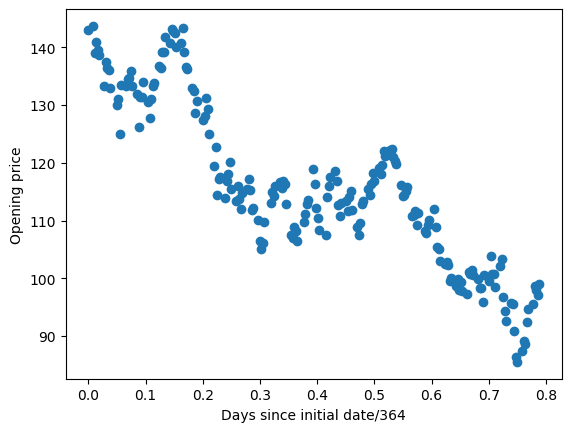

In [989]:
#graph the data
plt.scatter(x_train,y_train)
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.show()

## linear model

In [1067]:
def f(x,m,c):
    
    return m*x+c

In [1068]:
#define the loss
def loss_linear(x_train, y_train, m,c):
    total_loss=0 #because its like adding up, so start with 0

    for i in range(len(y_train)):
        individual_loss=(y_train[i]-m*(x_train[i])-c)**2
        total_loss=total_loss+individual_loss
        
        
        
    total_loss=total_loss/len(y_train)

    

    return total_loss

In [1069]:
#define the equations for each gradient
def m_gradient(x_train, y_train, m,c):
    total=0

    for i in range(len(y_train)):
        individual=(-1)*2*(y_train[i]-m*(x_train[i])-c)*(x_train[i])
        
        total+=individual
    total=total/len(y_train)
    
    return total

def c_gradient(x_train, y_train, m,c):
    total=0

    for i in range(len(y_train)):
        individual=(-1)*2*(y_train[i]-m*(x_train[i])-c)
        total+=individual
    total=total/len(y_train)
    
    return total

In [1070]:
def get_next_step(x_train,y_train,m,c,step):

    new_m = m - step*m_gradient(x_train,y_train,m,c)
    new_c = c - step*c_gradient(x_train,y_train,m,c)
    


    return new_m,new_c

In [1071]:

def gradient_descent(x_train,y_train,m,c,step,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_linear(x_train,y_train,m,c)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (m,c)=({m,c})")

        m,c=get_next_step(x_train,y_train,m,c,step)
    
    return loss_values,m,c

In [1072]:
stepsize=0.05
iterations=1000
m_init=-1
c_init=150

In [1073]:
loss_values,new_m,new_c=gradient_descent(x_train,y_train,m=m_init,c=c_init,step=stepsize,iterations=iterations)

Loss at iteration 0 is 1341.2885725401834 with (m,c)=((-1, 150))
Loss at iteration 5 is 477.954476672944 with (m,c)=((-7.658220224304155, 136.6563846611705))
Loss at iteration 10 is 225.52950896670188 with (m,c)=((-11.64599196893801, 129.64921781702785))
Loss at iteration 15 is 149.95327071605993 with (m,c)=((-14.188318182289244, 126.04634545914888))
Loss at iteration 20 is 125.65095575378186 with (m,c)=((-15.944280458302229, 124.27077263063352))
Loss at iteration 25 is 116.2899397498924 with (m,c)=((-17.268570854890044, 123.47438466297943))
Loss at iteration 30 is 111.35473603939334 with (m,c)=((-18.352158798520755, 123.20109860567554))
Loss at iteration 35 is 107.7987235844687 with (m,c)=((-19.29794990855575, 123.20568680093633))
Loss at iteration 40 is 104.73615689498462 with (m,c)=((-20.161479747880605, 123.3563298593746))
Loss at iteration 45 is 101.9066059323205 with (m,c)=((-20.97280135068805, 123.58220410545977))
Loss at iteration 50 is 99.2307245346151 with (m,c)=((-21.7482576

In [1074]:
m_final=-54.159512362511386,
c_final=137.3094115210408

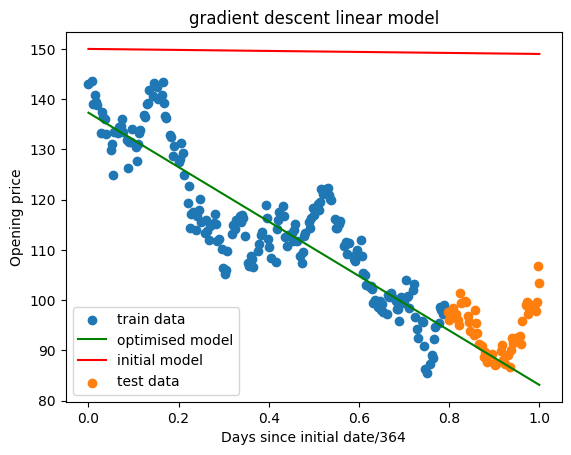

In [1075]:
#plot our result against the data!
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f(x,m_final,c_final),label="optimised model",color="green")
plt.plot(x,f(x,m_init,c_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("gradient descent linear model")
plt.show()

## Quadratic modell

In [1095]:
def f(x,a,b,c):
    return a*(x**2)+b*x+c

In [1096]:
#define the loss
def loss_quad(x_train, y_train, a,b,c):
    total_loss=0 #because its like adding up, so start with 0

    for i in range(len(y_train)):
        individual_loss=(y_train[i]-a*(x_train[i]**2)-b*x_train[i]-c)**2
        total_loss=total_loss+individual_loss
    total_loss=total_loss/len(y_train)

    return total_loss


In [1097]:
#define the equations for each gradient
def a_gradient(x_train, y_train, a,b,c):
    total=0

    for i in range(len(y_train)):
        individual=(-1)*2*(y_train[i]-a*(x_train[i]**2)-b*x_train[i]-c)*(x_train[i]**2)
        
        total+=individual
    total=total/len(y_train)
    
    return total

def b_gradient(x_train, y_train, a,b,c):
    total=0

    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(x_train[i]**2)-b*x_train[i]-c)*(-1)*(x_train[i])
        total+=individual
    total=total/len(y_train)
    
    return total

def c_gradient(x_train, y_train, a,b,c):
    total=0

    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(x_train[i]**2)-b*x_train[i]-c)*(-1)
        total+=individual
    total=total/len(y_train)
    
    return total
    

In [1098]:
def get_next_step(x_train,y_train,a,b,c,step):

    new_a = a - step*a_gradient(x_train,y_train,a,b,c)
    new_b = b - step*b_gradient(x_train,y_train,a,b,c)
    new_c = c - step*c_gradient(x_train,y_train,a,b,c)
    

    return new_a,new_b,new_c

In [1099]:
def gradient_descent(x_train,y_train,a,b,c,step,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_quad(x_train, y_train, a,b,c)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (a,b,c)=({a,b,c})")

        a,b,c=get_next_step(x_train,y_train,a,b,c,step)
    
    return loss_values,a,b,c

In [1100]:
stepsize=0.05
iterations=1000
a_init=1
b_init=-1
c_init=150

In [1115]:
gradient_descent_loss_quadratic,new_a,new_b,new_c=gradient_descent(x_train,y_train,a=a_init,b=b_init,c=c_init,step=stepsize,iterations=iterations)

Loss at iteration 0 is 1360.1649399835533 with (a,b,c)=((1, -1, 150))
Loss at iteration 5 is 449.44327602994 with (a,b,c)=((-2.8472259296169034, -7.613076220811765, 136.73232546221112))
Loss at iteration 10 is 197.97081795997192 with (a,b,c)=((-5.138816606541663, -11.406920236564115, 130.01645400600344))
Loss at iteration 15 is 126.42096244029446 with (a,b,c)=((-6.607777982774743, -13.717092446948136, 126.71378040399365))
Loss at iteration 20 is 104.12346115348359 with (a,b,c)=((-7.637177032025459, -15.241295008481329, 125.18592983034131))
Loss at iteration 25 is 95.44571318201068 with (a,b,c)=((-8.427367434491334, -16.344194952497467, 124.57777550265432))
Loss at iteration 30 is 90.66144267978787 with (a,b,c)=((-9.083297137749655, -17.2165702431233, 124.44310868183233))
Loss at iteration 35 is 87.10685068131144 with (a,b,c)=((-9.660091334856645, -17.95839907449536, 124.5492045138653))
Loss at iteration 40 is 84.04410356680759 with (a,b,c)=((-10.186851380082281, -18.62224056829351, 124

In [817]:
a_final=-19.91166629669572,
b_final=-38.05889787529781,
c_final=135.11024502536895

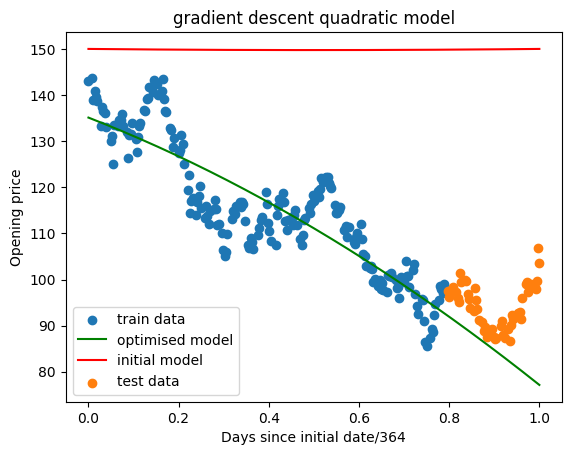

In [818]:
#plot our result against the data!
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f(x,a_final,b_final,c_final),label="optimised model",color="green")
plt.plot(x,f(x,a_init,b_init,c_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("gradient descent quadratic model")
plt.show()

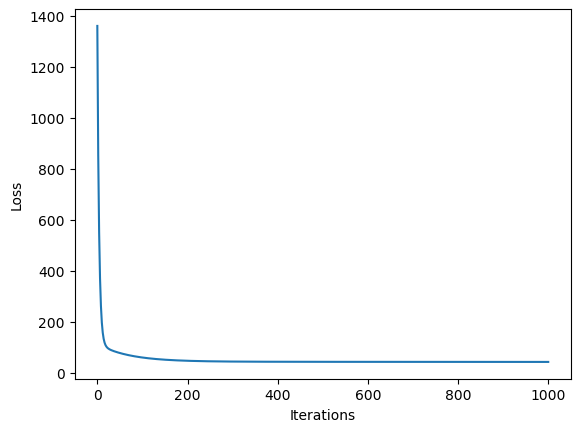

In [819]:
#plot our loss function evolving over iterations

plt.plot(np.linspace(0,iterations,iterations),loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## sin model

In [968]:
def f2(x,a,b,c,d):
    return a*np.sin(b*x)+c*x+d

In [969]:
#define the loss
def loss_sin(x_train, y_train, a,b,c,d):
    total_loss=0

    for i in range(len(y_train)):
        individual_loss=(y_train[i]-a*(np.sin(b*x_train[i]))-c*x_train[i]-d)**2
        total_loss+=individual_loss
    total_loss=total_loss/len(y_train)

    return total_loss

In [970]:
#define the equations for each gradient
def a_gradient_sin(x_train, y_train, a,b,c,d):
    total=0

    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(np.sin(b*x_train[i]))-c*x_train[i]-d)*(-np.sin(b*x_train[i]))
        
        total+=individual
    total=total/len(y_train)
    
    return total

def b_gradient_sin(x_train, y_train, a,b,c,d):
    total=0

    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(np.sin(b*x_train[i]))-c*x_train[i]-d)*(-a*np.cos(b*x_train[i]))*x_train[i]
        total+=individual
    total=total/len(y_train)

    
    return total

def c_gradient_sin(x_train, y_train, a,b,c,d):
    total=0

    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(np.
                                sin(b*x_train[i]))-c*x_train[i]-d)*(-x_train[i])
        total+=individual
    total=total/len(y_train)
    
    return total

def d_gradient_sin(x_train, y_train, a,b,c,d):
    total=0
    
    for i in range(len(y_train)):
        individual=2*(y_train[i]-a*(np.sin(b*x_train[i]))-c*x_train[i]-d)*(-1)
        
        total+=individual
    total=total/len(y_train)

    return total

In [971]:
def get_next_step_sin(x_train,y_train,a,b,c,d,step):

    new_a = a - step*a_gradient_sin(x_train,y_train,a,b,c,d)
    new_b = b - step*b_gradient_sin(x_train,y_train,a,b,c,d)
    new_c = c - step*c_gradient_sin(x_train,y_train,a,b,c,d)
    new_d = d - step*d_gradient_sin(x_train,y_train,a,b,c,d)
    


    return new_a,new_b,new_c,new_d

In [972]:
def gradient_descent_sin(x_train,y_train,a,b,c,d,step,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_sin(x_train, y_train, a,b,c,d)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (a,b,c,d)=({a,b,c,d})")

        a,b,c,d=get_next_step_sin(x_train,y_train,a,b,c,d,step)
    
    return loss_values,a,b,c,d

In [973]:
stepsize=0.05
iterations=1000
a_init=10
b_init=15
c_init=-50
d_init=100

In [974]:
loss_values_sin_gradient,a_final,b_final,c_final,d_final=gradient_descent_sin(x_train,y_train,a=a_init,b=b_init,c=c_init,d=d_init,step=stepsize,iterations=iterations)

Loss at iteration 0 is 1285.554748615554 with (a,b,c,d)=((10, 15, -50, 100))
Loss at iteration 5 is 377.1403483036783 with (a,b,c,d)=((10.628019687115923, 12.749444979047908, -44.70031397287478, 113.4784807419426))
Loss at iteration 10 is 145.9440099235042 with (a,b,c,d)=((10.736168497506721, 13.124211833115734, -42.03310584457283, 120.6961044052111))
Loss at iteration 15 is 69.72599017162375 with (a,b,c,d)=((10.361222771002517, 13.71741754082245, -40.57943153909379, 124.81835512013042))
Loss at iteration 20 is 41.18579081324082 with (a,b,c,d)=((9.865867015354127, 14.261850220862225, -39.744136061634904, 127.28711958220353))
Loss at iteration 25 is 30.053658078871482 with (a,b,c,d)=((9.407699946763492, 14.642232527341486, -39.267496910037956, 128.79722759104004))
Loss at iteration 30 is 25.92957352934179 with (a,b,c,d)=((9.035396311760012, 14.828441723152773, -39.028636828088096, 129.70806039737127))
Loss at iteration 35 is 24.402646625575567 with (a,b,c,d)=((8.744270149874664, 14.9084

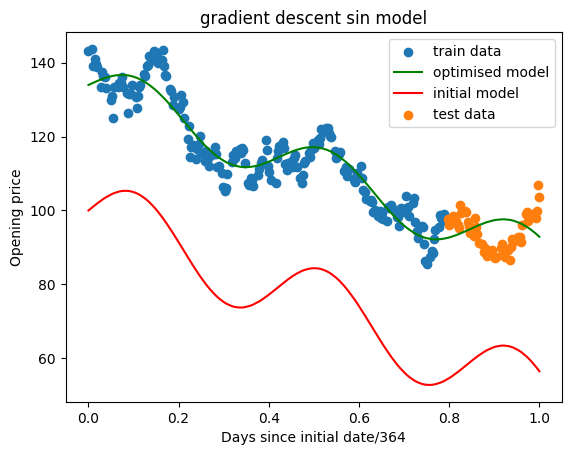

In [975]:
#plot our result against the data!
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f2(x,a_final,b_final,c_final,d_final),label="optimised model",color="green")
plt.plot(x,f2(x,a_init,b_init,c_init,d_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("gradient descent sin model")
plt.show()

In [976]:
loss_sin(x_test,y_test,a_final,b_final,c_final,d_final)

40.03971992206624

## newton's method

#### 

## sin function

In [1049]:
def aa_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual=2*np.sin(b*x_array[i])*np.sin(b*x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ab_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*x_array[i]*np.cos(b*x_array[i])*(-y_array[i]+2*a*np.sin(b*x_array[i])+c*x_array[i]+d)
        
        total+=individual
    total=total/len(y_array)
    
    return total


def ac_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*x_array[i]*np.sin(b*x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ad_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*np.sin(b*x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total


def ba_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        xi=x_array[i]
        yi=y_array[i]
        sinbxi=np.sin(b*xi)
        cosbxi=np.cos(b*xi)
        individual= 2*(-yi*xi*cosbxi + 2*a*xi*sinbxi*cosbxi + c*(xi**2)*cosbxi + d*xi*cosbxi)
        
        total+=individual
    total=total/len(y_array)
    
    return total

def bb_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        xi=x_array[i]
        yi=y_array[i]
        sinbxi=np.sin(b*xi)
        cosbxi=np.cos(b*xi)
        individual= 2*(a*yi*xi*xi*sinbxi + (a*xi*cosbxi)**2 - (a*xi*sinbxi)**2 -a*c*(xi**3)*sinbxi - a*d*(xi**2)*sinbxi)
        
        total+=individual
    total=total/len(y_array)
    
    return total

def bc_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*x_array[i]*a*np.cos(b*x_array[i])*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total

def bd_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*a*np.cos(b*x_array[i])*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ca_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*np.sin(b*x_array[i])*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total


def cb_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*a*np.cos(b*x_array[i])*x_array[i]*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cc_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*(x_array[i]**2)
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cd_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*(x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def da_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*np.sin(b*x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total


def db_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*a*np.cos(b*x_array[i])*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total


def dc_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2*x_array[i]
        
        total+=individual
    total=total/len(y_array)
    
    return total

def dd_sin(x_array, y_array, a,b,c,d):
    total=0

    for i in range(len(y_array)):
        individual= 2
        
        total+=individual
    total=total/len(y_array)
    
    return total


In [1050]:
#create matrices
def get_hessian(x_array, y_array, a,b,c,d):
    H=np.array([[aa_sin(x_array, y_array, a,b,c,d), ab_sin(x_array, y_array, a,b,c,d), ac_sin(x_array, y_array, a,b,c,d), ad_sin(x_array, y_array, a,b,c,d)],
               [ba_sin(x_array, y_array, a,b,c,d), bb_sin(x_array, y_array, a,b,c,d), bc_sin(x_array, y_array, a,b,c,d), bd_sin(x_array, y_array, a,b,c,d)],
               [ca_sin(x_array, y_array, a,b,c,d), cb_sin(x_array, y_array, a,b,c,d), cc_sin(x_array, y_array, a,b,c,d), cd_sin(x_array, y_array, a,b,c,d)],
               [da_sin(x_array, y_array, a,b,c,d), db_sin(x_array, y_array, a,b,c,d), dc_sin(x_array, y_array, a,b,c,d), dd_sin(x_array, y_array, a,b,c,d)]])

    return np.linalg.inv(H)

In [1051]:
def newton_get_next_step_sin(x_array,y_array,a,b,c,d):

    parameters=np.array([a,b,c,d])

    gradients=np.array([a_gradient_sin(x_array,y_array,a,b,c,d),b_gradient_sin(x_array,y_array,a,b,c,d),c_gradient_sin(x_array,y_array,a,b,c,d),d_gradient_sin(x_array,y_array,a,b,c,d)])

    new_parameters = parameters - np.matmul(get_hessian(x_array, y_array, a,b,c,d),gradients)
    
    new_a=new_parameters[0]
    new_b=new_parameters[1]
    new_c=new_parameters[2]
    new_d=new_parameters[3]
    
    

    return new_a,new_b,new_c,new_d

In [1052]:
newton_get_next_step_sin(x,y,a_init,b_init,c_init,d_init)

(5.595746329996911, 15.36481846889321, -48.46456763075224, 134.88165916934838)

In [1053]:
def newton_method_sin(x_array,y_array,a,b,c,d,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_sin(x_array, y_array, a,b,c,d)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (a,b,c,d)=({a,b,c,d})")

        a,b,c,d=newton_get_next_step_sin(x_array,y_array,a,b,c,d)
    

    return loss_values,a,b,c,d

In [1061]:
iterations=1000
a_init=10
b_init=15
c_init=-50
d_init=100

In [1062]:
newton_sin_loss,a_final,b_final,c_final,d_final=newton_method_sin(x,y,a_init,b_init,c_init,d_init,iterations)

Loss at iteration 0 is 1274.6162009841155 with (a,b,c,d)=((10, 15, -50, 100))
Loss at iteration 5 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 10 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 15 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 20 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 25 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 30 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.500637089190631, -46.90037051539121, 134.24347841414829))
Loss at iteration 35 is 23.651350778640374 with (a,b,c,d)=((6.222772820627981, 14.5

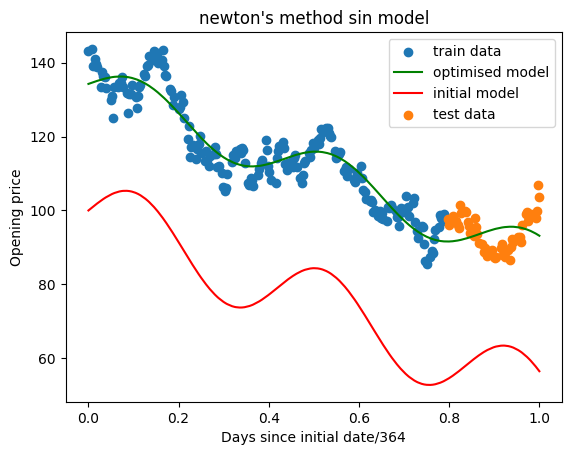

In [1063]:
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f2(x,a_final,b_final,c_final,d_final),label="optimised model",color="green")
plt.plot(x,f2(x,a_init,b_init,c_init,d_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("newton's method sin model")
plt.show()

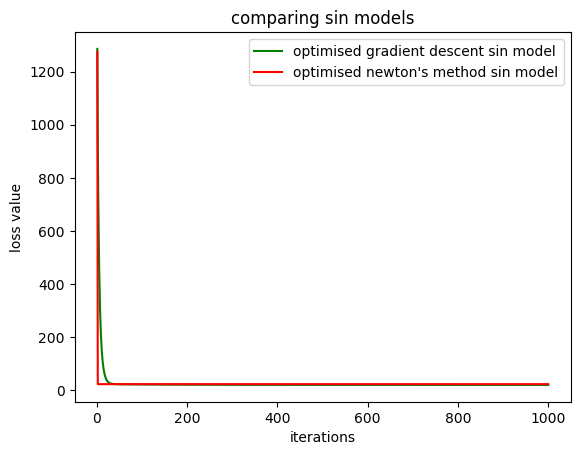

In [1112]:
plt.plot(np.linspace(1,1000,1000),loss_values_sin_gradient,label="optimised gradient descent sin model",color="green")
plt.plot(np.linspace(1,1000,1000),newton_sin_loss,label="optimised newton's method sin model",color="red")
plt.xlabel('iterations')
plt.ylabel('loss value')
plt.title("comparing sin models")
plt.legend()
plt.show()

In [1059]:
loss_sin(x_test,y_test,a_final,b_final,c_final,d_final)

32.611178265903824

## linear

In [1076]:
def mm_linear(x_array, y_array,m,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**2
        
        total+=individual
    total=total/len(y_array)
    
    return total

def mc_linear(x_array, y_array,m,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cm_linear(x_array, y_array,m,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cc_linear(x_array, y_array,m,c):
    total=0

    for i in range(len(y_array)):
        individual=2
        
        total+=individual
    total=total/len(y_array)
    
    return total

In [1077]:
#create matrices
def get_hessian(x_array, y_array,m,c):
    H=np.array([[mm_linear(x_array, y_array,m,c), mc_linear(x_array, y_array,m,c)],
               [cm_linear(x_array, y_array,m,c), cc_linear(x_array, y_array,m,c)]])
               
                
    return np.linalg.inv(H)

In [1078]:
def newton_get_next_step_linear(x_array,y_array,m,c):

    parameters=np.array([m,c])

    gradients=np.array([m_gradient(x_array,y_array,m,c),c_gradient(x_array,y_array,m,c)])
 
    new_parameters = parameters - np.matmul(get_hessian(x_array, y_array,m,c),gradients)


    new_m=new_parameters[0]
    new_c=new_parameters[1]
    
                    
    

    return new_m,new_c

In [1079]:
m_init=-1
c_init=150
iterations=1000

In [1080]:
newton_get_next_step_linear(x_train,y_train,m_init,c_init)

(-54.60951151334771, 137.4973293926841)

In [1081]:
def newton_linear(x_train,y_train,m,c,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_linear(x_train, y_train, m,c)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (m,c)=({m,c})")

        m,c=newton_get_next_step_linear(x_train,y_train,m,c)
    
    return loss_values,m,c

In [1082]:
loss_value,m_final,c_final=newton_linear(x_train,y_train,m_init,c_init,iterations)

Loss at iteration 0 is 1341.2885725401834 with (m,c)=((-1, 150))
Loss at iteration 5 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 10 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 15 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 20 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 25 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 30 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 35 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 40 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 45 is 41.87243612760559 with (m,c)=((-54.60951151334769, 137.49732939268412))
Loss at iteration 50 is 41.87243612760559 with (m,c)=((-54.6095115133476

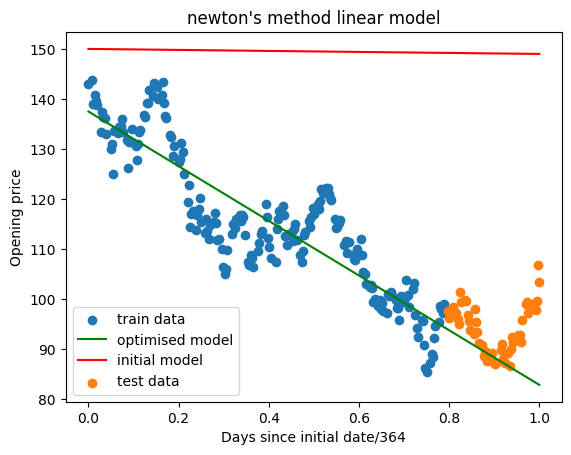

In [1083]:
#plot our result against the data!
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f(x,m_final,c_final),label="optimised model",color="green")
plt.plot(x,f(x,m_init,c_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("newton's method linear model")
plt.show()

In [1084]:
loss_linear(x_test,y_test,m_final,c_final)

71.16564958185788

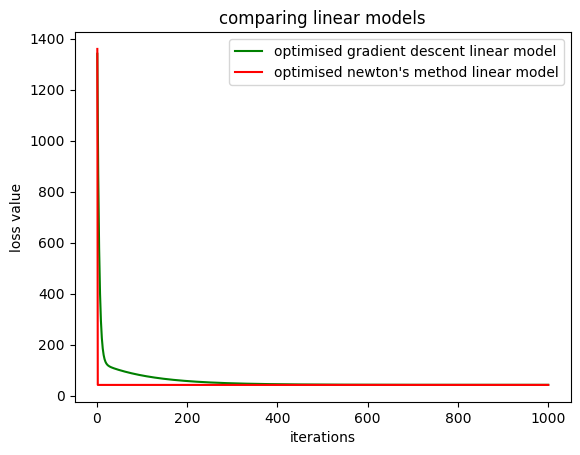

In [1113]:
plt.plot(np.linspace(1,1000,1000),loss_values,label="optimised gradient descent linear model",color="green")
plt.plot(np.linspace(1,1000,1000),loss_value,label="optimised newton's method linear model",color="red")
plt.xlabel('iterations')
plt.ylabel('loss value')
plt.title("comparing linear models")
plt.legend()
plt.show()

## quadratic

In [1101]:
def aa_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**4
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ab_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**3
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ac_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**2
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ba_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**3
        
        total+=individual
    total=total/len(y_array)
    
    return total

def bb_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**2
        
        total+=individual
    total=total/len(y_array)
    
    return total

def bc_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def ca_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])**2
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cb_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2*(x_array[i])
        
        total+=individual
    total=total/len(y_array)
    
    return total

def cc_quadratic(x_array, y_array,a,b,c):
    total=0

    for i in range(len(y_array)):
        individual=2
        
        total+=individual
    total=total/len(y_array)
    
    return total

In [1102]:
#create matrices
def get_hessian(x_array, y_array, a,b,c):
    H=np.array([[aa_quadratic(x_array, y_array, a,b,c),  ab_quadratic(x_array, y_array, a,b,c), ac_quadratic(x_array, y_array, a,b,c)],
               [ba_quadratic(x_array, y_array, a,b,c), bb_quadratic(x_array, y_array, a,b,c), bc_quadratic(x_array, y_array, a,b,c)],
               [ca_quadratic(x_array, y_array, a,b,c), cb_quadratic(x_array, y_array, a,b,c), cc_quadratic(x_array, y_array, a,b,c)]]),

    return np.linalg.pinv(H)



In [1103]:
def newton_get_next_step_quadratic(x_array,y_array,a,b,c):

    parameters=np.array([a,b,c])

    gradients=np.array([a_gradient(x_array,y_array,a,b,c),b_gradient(x_array,y_array,a,b,c),c_gradient(x_array,y_array,a,b,c)])

    new_parameters = parameters - np.matmul(get_hessian(x_array, y_array, a,b,c),gradients)

    new_a=new_parameters[0][0]
    new_b=new_parameters[0][1]
    new_c=new_parameters[0][2]
 

    return new_a,new_b,new_c

In [1104]:
a_init=1
b_init=-1
c_init=150
iterations=1000

In [1105]:
newton_get_next_step_quadratic(x_train,y_train,a_init,b_init,c_init)

(12.552440791479967, -64.585835472388, 138.81632121957927)

In [1106]:
def newton_quadratic(x_train,y_train,a,b,c,iterations):

    loss_values=[]
    for iter in range(iterations):
        current_loss = loss_quad(x_train, y_train, a,b,c)
        loss_values.append(current_loss)

        if iter%5==0:
            print(f"Loss at iteration {iter} is {current_loss} with (a,b,c)=({a,b,c})")

        a,b,c=newton_get_next_step_quadratic(x_train,y_train,a,b,c)
    
    return loss_values,a,b,c

In [1114]:
newton_loss_quadratic,a_final,b_final,c_final=newton_quadratic(x_train,y_train,a_init,b_init,c_init,iterations)

Loss at iteration 0 is 1360.1649399835533 with (a,b,c)=((1, -1, 150))
Loss at iteration 5 is 41.52752162091863 with (a,b,c)=((12.55244079147663, -64.58583547238496, 138.81632121957898))
Loss at iteration 10 is 41.527521620918634 with (a,b,c)=((12.552440791476736, -64.58583547238504, 138.81632121957898))
Loss at iteration 15 is 41.52752162091865 with (a,b,c)=((12.552440791476723, -64.58583547238503, 138.81632121957898))
Loss at iteration 20 is 41.527521620918634 with (a,b,c)=((12.552440791476746, -64.58583547238506, 138.81632121957898))
Loss at iteration 25 is 41.527521620918634 with (a,b,c)=((12.552440791476736, -64.58583547238504, 138.81632121957898))
Loss at iteration 30 is 41.52752162091865 with (a,b,c)=((12.552440791476723, -64.58583547238503, 138.81632121957898))
Loss at iteration 35 is 41.527521620918634 with (a,b,c)=((12.552440791476746, -64.58583547238506, 138.81632121957898))
Loss at iteration 40 is 41.527521620918634 with (a,b,c)=((12.552440791476736, -64.58583547238504, 138.

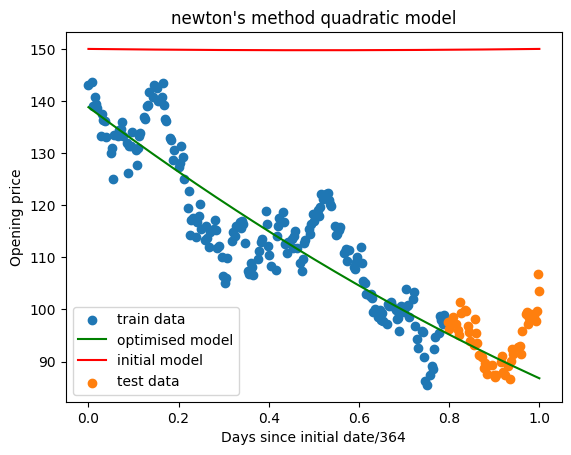

In [1108]:
plt.scatter(x_train,y_train,label="train data")
plt.plot(x,f(x,a_final,b_final,c_final),label="optimised model",color="green")
plt.plot(x,f(x,a_init,b_init,c_init),label="initial model",color="red")
plt.xlabel('Days since initial date/364')
plt.ylabel('Opening price')
plt.scatter(x_test,y_test,label="test data")
plt.legend()
plt.title("newton's method quadratic model")
plt.show()



In [1109]:
loss_quad(x_test,y_test,a_final,b_final,c_final)

42.12947178852168

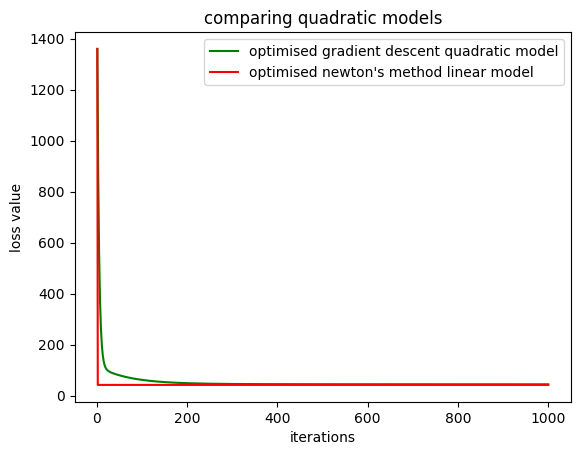

In [1117]:
plt.plot(np.linspace(1,1000,1000),gradient_descent_loss_quadratic,label="optimised gradient descent quadratic model",color="green")
plt.plot(np.linspace(1,1000,1000),newton_loss_quadratic,label="optimised newton's method linear model",color="red")
plt.xlabel('iterations')
plt.ylabel('loss value')
plt.title("comparing quadratic models")
plt.legend()
plt.show()